# Grama Model Building

*Purpose*: Grama provides tools to work with models, but in order to use these tools we need to be able to buidl models in grama! This exercise will introduce fundamental concepts for building and sanity-checking models. We'll build on these skills in future exercises.


## Setup


In [1]:
import grama as gr
import pandas as pd
DF = gr.Intention()
%matplotlib inline

# Composition

Recall that there are four classes of verb in grama; *composition* verbs take a model as an input and produce a new model as an output. Using compositions we can add information to a model, such as input metadata and functions.



![Grama verb class diagram](./images/verb-classes.png)


# Useful Programming Tools

To build grama models, we'll need to use a few simple programming tools.


## Lambda functions

In an earlier exercise, we learned how to define Python functions using the `def` keyword:

```python
def fcn(x):
    return x ** 2
```

However, we can define the same function with `lambda` syntax:

```python
fcn = lambda x: x ** 2
```

A `lambda` function starts with the keyword `lambda`, and is followed by its arguments. The example above has just one argument `x`. After the arguments comes a colon `:`, which signals that what follows is the output of the function.

The advantage of this `lambda` syntax is that it is more compact, and can be incorporated with a grama model building pipeline. Let's get some practice defining lambda functions.


### __q1__ Implement a `lambda` function

Use the `lambda` syntax to implement the following function:

$$f(x) = x + 1$$


In [2]:
# TASK: Create a lambda function to implement the function above

fcn = lambda x: x + 1
# Use the following to check your work
assert \
    fcn(1) == 2, \
    "Incorrect value"

print("Success!")

Success!


## Working with DataFrames

Grama uses DataFrames to represent data and to interface with models. The constructor `gr.df_make()` is a convenient way to make a simple DataFrame:


In [3]:
# NOTE: No need to edit; recall that gr.df_make(...)
# helps us construct DataFrames
gr.df_make(
    x=[1, 2, 3],
    y=["a", "b", "c"],
    z="recycled value",
)

,x,y,z
0,1,a,recycled value
1,2,b,recycled value
2,3,c,recycled value


We can *combine* this DataFrame constructor with a `lambda` function to take a DataFrame as an input, and return a DataFrame as an output. For instance, the following is a DataFrame version of the previous `lambda` function:

```python
fcn_df = lambda df: gr.df_make(y=df.x ** 2)
```

Note that this `lambda` function takes in a DataFrame, uses specific columns from that input `df`, and returns a DataFrame.


### __q2__ Functions on DataFrames

Use the `lambda` syntax to implement the following function:

$$y(x) = x + 1$$

Make sure your lambda function takes a DataFrame as an argument, and returns a DataFrame as an output.

In [4]:
# TASK: Create a lambda function based on DataFrames

fcn_df = lambda df: gr.df_make(y=df.x + 1)
# NOTE: Use the following to check your work
df_res = fcn_df(gr.df_make(x=[0, 1]))
df_out = gr.df_make(y=[1, 2])

assert \
    isinstance(df_res, pd.DataFrame), \
    "Output must be DataFrame"

assert \
    gr.df_equal(df_res, df_out), \
    "Incorrect output"

print("Success!")

Success!


# Constructing Grama Models

Remember that *composition* verbs take in a grama model and return a new model. We use compositions primarily to construct grama models. We can start a blank model with `gr.Model()`, but then we need to add functionality to that model!


## Add a function

One of the most core parts of a model is its set of *functions*; these map from inputs to outputs. For functions defined by simple mathematical expressions, the composition `gr.cp_vec_function()` is the appropriate tool for the job.


### __q3__ Add a function to a model

Add a function to `md_basic` that provides the output `y = x + 1`.

*Hint 1*: Consult the documentation for `gr.cp_vec_function()` to see what arguments it requires. Remember that you can use `help(gr.cp_vec_function)` or use `Shift + Tab` to bring up the documentation at your cursor.

*Hint 2*: Use a DataFrame-based lambda function, as you did for q2 above.


In [5]:
# TASK: Finish implementing the model
md_basic = (
    gr.Model("Basic model")
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            y=df.x + 1
        ),
        var=["x"],
        out=["y"],
    )
)

# NOTE: Use the following to check your work
df_res = (
    md_basic
    >> gr.ev_df(gr.df_make(x=0))
)
df_out = gr.df_make(x=0, y=1)

assert \
    set(md_basic.var) == {"x"}, \
    "md_basic has wrong variables"
    
assert \
    set(md_basic.out) == {"y"}, \
    "md_basic has wrong outputs"

assert \
    gr.df_equal(df_res, df_out), \
    "md_basic function incorrect"
    
print("Success!")

Success!


## Add bounds

Once your model has a function, it is useful to define bounds for the inputs. This does not *force* the model to reject values outside the bounds, but rather serves as useful *metadata* about the model. Bounds are used by other verbs like exploratory tools (e.g. for parameter sweeps) and optimization.

The verb `gr.cp_bounds()` allows you to add bounds for inputs.


### __q4__ Add bounds to a model

For the following model, add bounds $0 \leq x_1 \leq 1$ and $0 \leq x_2 \leq 1$.


In [6]:
# TASK: Finish implementing the model
md_bounded = (
    gr.Model("Bounded input")
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            y=gr.sin(df.x1) + gr.sin(df.x2)**2
        ),
        var=["x1", "x2"],
        out=["y"],
    )
    >> gr.cp_bounds(
        x1=(0, 1),
        x2=(0, 1),
    )
)

# NOTE: Use the following to check your work
assert \
    (md_bounded.domain.bounds["x1"][0] == 0) and \
    (md_bounded.domain.bounds["x1"][1] == 1) and \
    (md_bounded.domain.bounds["x2"][0] == 0) and \
    (md_bounded.domain.bounds["x2"][1] == 1), \
    "md_bounded bounds incorrect"
    
print("Success!")

Success!


A model with functions and bounds already has a lot of useful information! There is a lot more information that a grama model can have, but that's enough model building for this exercise.


## Composition: Quick Reference

As a quick-reference, here is a list of the most important grama composition verbs. Note that some of these are covered later in the exercise sequence; most notably, the verbs related to quantifying uncertainties (marginals and copulas).

| Verb | Description |
|---|---|
| `gr.Model()` | Start a new grama model |
| `gr.cp_vec_function()` | Add a *vectorized* (DataFrame-based) function |
| `gr.cp_function()` | Add a *non-vectorized* (array-based) function |
| `gr.cp_bounds()` | Add bounds for inputs |
| `gr.cp_marginals()` | Add marginal distributions for inputs |
| `gr.cp_copula_independence()` | Assume random inputs are independent |
| `gr.cp_copula_gaussian()` | Assume random inputs are correlated |


# Checking models

Once you've built a grama model, you can use a variety of tools to work with the model. These are useful for making sense of model behavior.

One of the most key studies you can do with a model is a parameter sweep. There are a variety of grama tools to help do parameter sweeps.


### __q5__ Create a grid of values

The verb `gr.df_grid()` is a helper function that creates a "grid" of points. Modify the code below to see how this function operates.


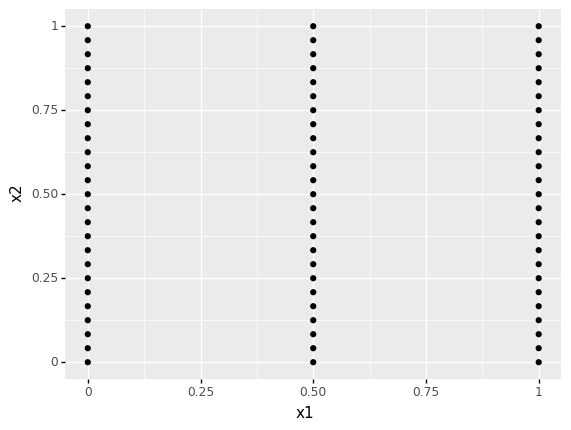

<ggplot: (8793259304930)>

In [7]:
# TASK: Modify the code, note the changes
(
    # TODO: Try modifying the following code; see how
    # the results change
    gr.df_grid(
        x1=[0.0, 0.5, 1.0],
        x2=gr.linspace(0, 1, 25),
    )
    
    # NOTE: No need to edit the following
    >> gr.ggplot(gr.aes("x1", "x2"))
    + gr.geom_point()
)

Once you've created a grid of points, you can evaluate the model on that grid to perform a parameter sweep.


### __q6__ Evaluate a grid of values

Create a grid of points in `x1` and `x2` to evaluate the model.


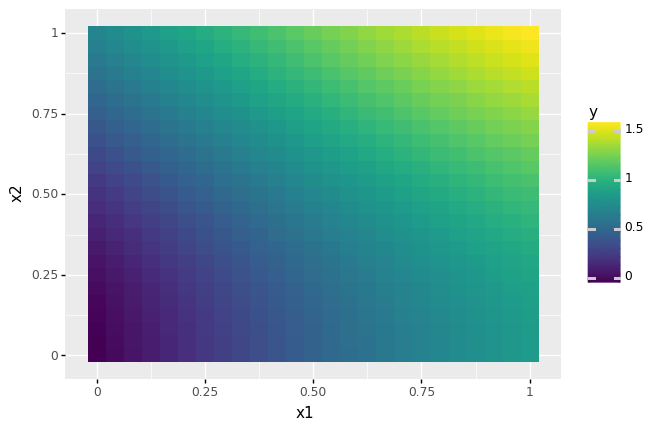

<ggplot: (8793259611332)>

In [8]:
# TASK: Create a grid of points
(
    md_bounded
    >> gr.ev_df(

        gr.df_grid(
            x1=gr.linspace(0, 1, 25),
            x2=gr.linspace(0, 1, 25),
        )
    )
    
    >> gr.ggplot(gr.aes("x1", "x2", fill="y"))
    + gr.geom_tile()
)

## Model sanity checks

Parameter sweeps are particularly useful when checking that you implemented a model *correctly*. For example, let's suppose someone implemented the following function in a model

$$\begin{aligned}f(x, y) &= x + y^2 \,|\, x < 1/2 \\ & = 1 - x + y^2 \,|\, x \geq 1/2 \end{aligned}$$

The following code *attempts* to implement the function as a grama model.


In [9]:
# NOTE: No need to edit; you'll explore this model in the next task
md_error = (
    gr.Model("Error example")
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            f=(df.x + df.y**2) * (df.x < 0.5)
             +(1 + df.x + df.y**2) * (df.x >= 0.5)
        ),
        var=["x", "y"],
        out=["f"],
    )
    >> gr.cp_bounds(
        x=(0, 1),
        y=(0, 1),
    )
)
md_error

model: Error example

  inputs:
    var_det:
      y: [0, 1]
      x: [0, 1]

    var_rand:

    copula:
      None

  functions:
      f0: ['x', 'y'] -> ['f']

However, the model implementation above is in error. Up next, you'll use a parameter sweep to help find the error.


### __q7__ Find the error

Construct a sinew plot to inspect the model behavior and find the implementation error. Answer the questions under *observations* below.

Make sure to sweep over all the deterministic variables in the model. Remember that the effect of `x` should switch from positive to negative at the midpoint of its domain.

*Hint*: We learned about sinew plots in the previous grama exercise `e-grama01-basics`.


Calling plot_sinew_outputs....


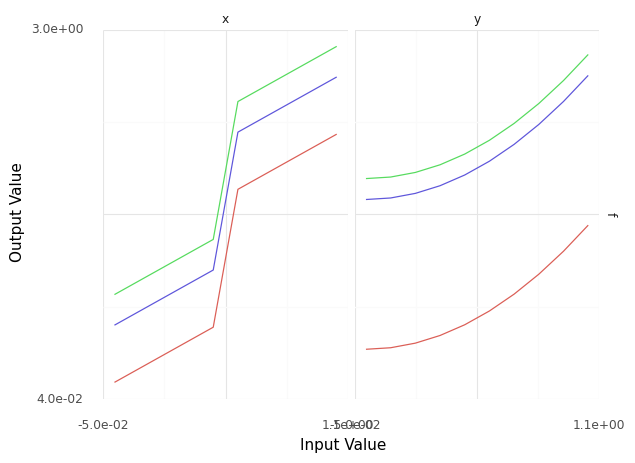

<ggplot: (8793259875428)>

In [10]:
# TASK: Explore the model's behavior to find the implementation error
(
    md_error

    >> gr.ev_sinews(df_det="swp")
    # NOTE: No need to edit; use this to visualize your results
    >> gr.pt_auto()
)

*Observations*

- Do there appear to be any "jumps" in the output? Which variable seems to cause the jump?
  - Yes, there's a jump in `x` around the middle of its domain.
- What is the error in the implementation?
  - The sign of `x` in the second part of the piecewise function is wrong; it should be negative.
<!-- solution-end -->

# Payoff: Rapid model exploration

One of the big payoffs from these model building tools is the ability to rapidly explore models. Since a grama model includes a lot of information (functions and bounds), the tools for evaluating and visualizing models are extremely simple.

For instance, we can re-build the model to fix the sign error on `x`, and quickly construct a sinew plot to verify that we've fixed the issue:


Calling plot_sinew_outputs....


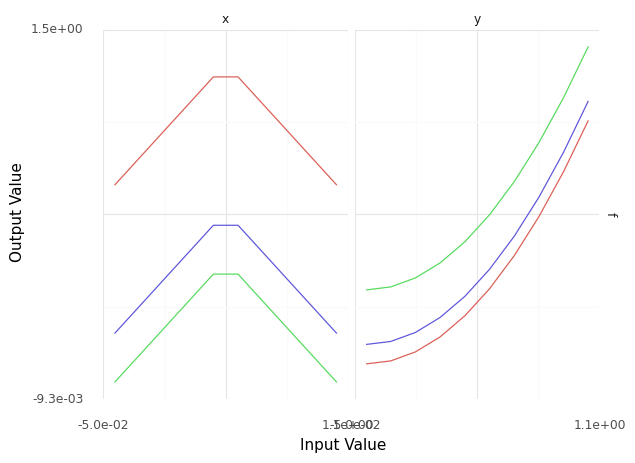

<ggplot: (8793260085965)>

In [11]:
# NOTE: No need to edit; this fixes the model
(
    # Build the model
    gr.Model("Fixed model")
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            f=(df.x + df.y**2) * (df.x < 0.5)
             +(1 - df.x + df.y**2) * (df.x >= 0.5)
        ),
        var=["x", "y"],
        out=["f"],
    )
    >> gr.cp_bounds(x=(0, 1), y=(0, 1))
    
    # Evaluate
    >> gr.ev_sinews(df_det="swp")
    
    # Plot
    >> gr.pt_auto()
)

We'll see in the next grama exercise how to generate and visualize contour data. Once we've implemented a model, the syntax for generating a contour plot is quite simple:


Calling plot_contour....


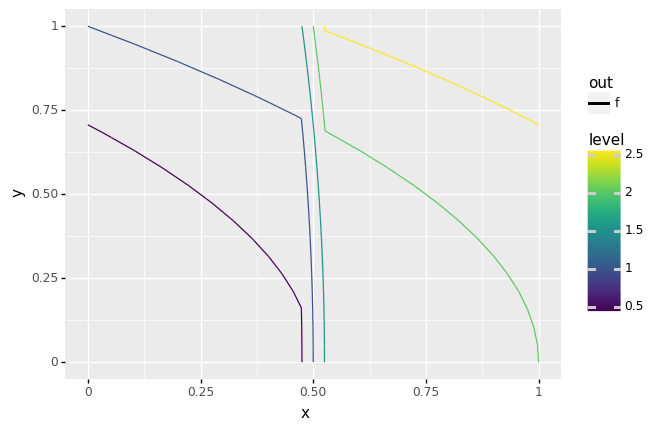

<ggplot: (8793259932356)>

In [12]:
# NOTE: No need to edit; this generates a contour plot
(
    # Select the model
    md_error
    # Evaluate
    >> gr.ev_contour(
        var=["x", "y"],
        out=["f"],
    )
    # Plot
    >> gr.pt_auto()
)